# 1. Introduction

**Data Dictionary**

1. **Person ID**: An identifier for each individual.
2. **Gender**: The gender of the person (Male/Female).
3. **Age**: The age of the person in years.
4. **Occupation**: The occupation or profession of the person.
5. **Sleep Duration (hours)**: The number of hours the person sleeps per day.
6. **Quality of Sleep (scale: 1-10)**: A subjective rating of the quality of sleep, ranging from 1 to 10.
7. **Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.
8. **Stress Level (scale: 1-10)**: A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9. **BMI Category**: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. **Blood Pressure (systolic/diastolic)**: The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. **Heart Rate (bpm)**: The resting heart rate of the person in beats per minute.
12. **Daily Steps**: The number of steps the person takes per day.


# 2. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Loading the Dataset

In [ ]:
stress = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

# 4. Data Exploration

In [ ]:
stress.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


We can observe that there are some null values in Sleep Disorder column which has to be filled and some columns with object datatypes that have to be encoded.

In [ ]:
stress.shape

(374, 13)

In [ ]:
stress['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

The presence of "Nan" value indicates that the individual does not have sleep disorder.
Therefore, we will replace it with the term "Nothing".

In [ ]:
stress = stress.fillna("Nothing")
stress.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nothing
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nothing


Now, let's check for duplicate entries in the 'stress' DataFrame.


In [ ]:
duplicate_rows = stress[stress.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


Listing exact number of unique values in the columns:

In [ ]:
dict = {}
for i in list(stress.columns):
    dict[i] = stress[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Person ID,374
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,4
Blood Pressure,25


Checking all the features that might be categorical or could be improved to make data more consistent.

In [ ]:
stress['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

We can observe that in the "BMI Category" column, the term "Normal" and "Normal Weight" have same meaning. Hence, we replace the value with "Normal" for consistency.


In [ ]:
stress["BMI Category"] = stress["BMI Category"].replace("Normal Weight", "Normal")

In [ ]:
stress['Stress Level'].value_counts()

,count
Stress Level,
3,71
8,70
4,70
5,67
7,50
6,46


In [ ]:
stress['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

**Label Encoding**

The dataset includes categorical data, such as "Occupation", "BMI Category", and "Sleep Disorder Columns".
We perform 'Label Encoding' to convert these categorical values into numerical data.

Label Encoding assigns a unique numerical label to each category in a categorical feature.
Algorithms used for computation, including those employed in machine learning, typically require numeric inputs for effective processing and analysis.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
cat_cols=['Gender','Occupation','BMI Category','Sleep Disorder']
for col in cat_cols:
    stress[col] = label_encoder.fit_transform(stress[col])

stress.tail(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
372,373,0,59,5,8.1,9,75,3,2,140/95,68,7000,2
373,374,0,59,5,8.1,9,75,3,2,140/95,68,7000,2


In the "Blood Pressure" column, the entries are in '140/95' format. This might lead to further inconsistencies, hence we split the blood pressure into two unique columns. i.e. 'Systolic BP' and 'Diastolic BP'.

In [ ]:
stress[['Systolic BP', 'Diastolic BP']] = stress['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type
stress[['Systolic BP', 'Diastolic BP']] = stress[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)

# Drop the original 'Blood Pressure' column
stress = stress.drop('Blood Pressure', axis=1)

stress.head(1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,1,27,9,6.1,6,42,6,2,77,4200,1,126,83


The 'Person ID' column does not contain relevant information as all the values are unique identifiers, so we drop it.

In [ ]:
stress.drop('Person ID', axis=1, inplace=True)

Shifting the column "Stress Level" to the last position of the dataset for easier access.

In [ ]:
stress_level_index = stress.columns.get_loc('Stress Level')

columns = list(stress.columns[:stress_level_index]) + list(stress.columns[stress_level_index+1:]) + ['Stress Level']

stress = stress[columns]
stress.tail(1)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,Stress Level
373,0,59,5,8.1,9,75,2,68,7000,2,140,95,3


In [ ]:
stress['Occupation'].unique()

array([ 9,  1,  6, 10,  5,  2,  0,  8,  3,  7,  4])

# 5. Data Visualization

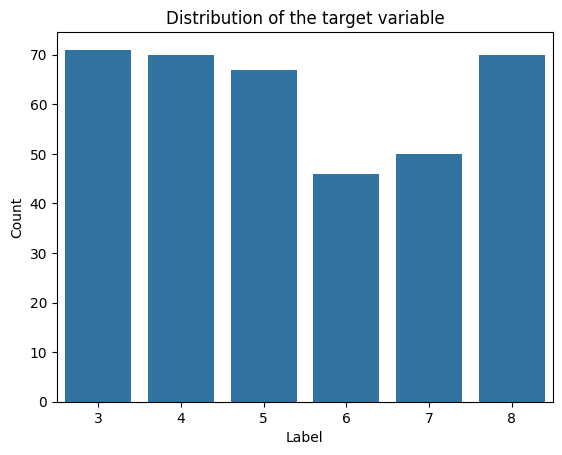

In [ ]:
sns.countplot(x='Stress Level', data=stress)

plt.xlabel('Label')

plt.ylabel('Count')

plt.title('Distribution of the target variable')

# Displaying the plot
plt.show()

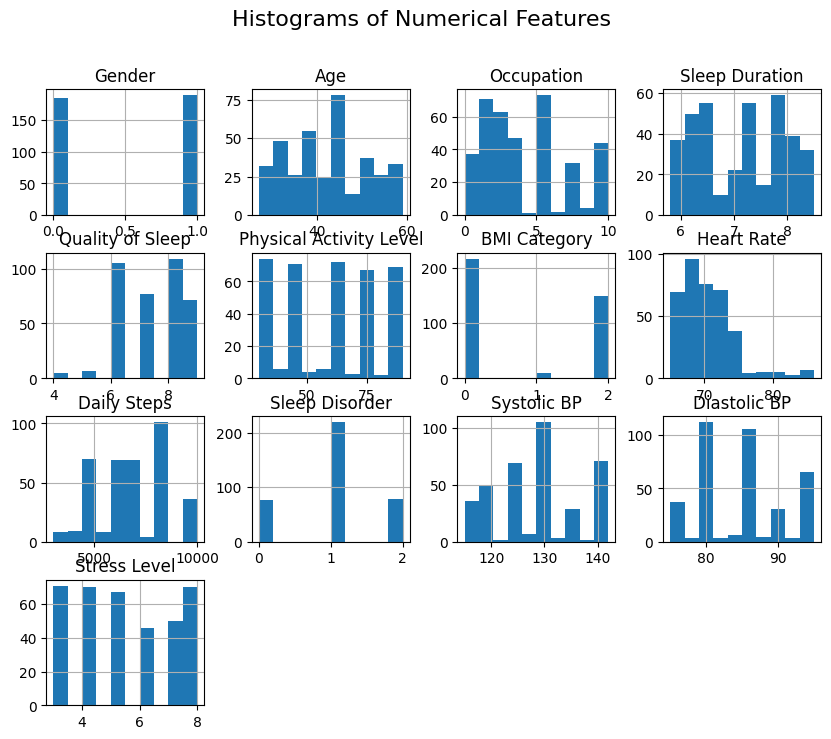

In [ ]:
# Histograms for each numerical feature
stress.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

In [ ]:
fig = px.violin(stress, x='Heart Rate', y='Stress Level', title='Stress Distribution by Heart Rate', color_discrete_sequence=['#FFD700'])
fig.update_layout(xaxis_title='Heart Rate', yaxis_title='Stress Level',width=600,height=500)
fig.show()

In [ ]:
fig = px.pie(
    names=stress['Occupation'].value_counts().index,
    values=stress['Occupation'].value_counts().values,
    title='Distribution of Occupation',
    width=600, height=500
)
fig.show()


In [ ]:
fig = px.box(stress, x='Stress Level', y='Occupation', title='Stress Level Distribution by Occupation', color_discrete_sequence=['lightgreen'])
fig.update_layout(xaxis_title='Stress Level', yaxis_title='Occupation', width=600, height=500)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

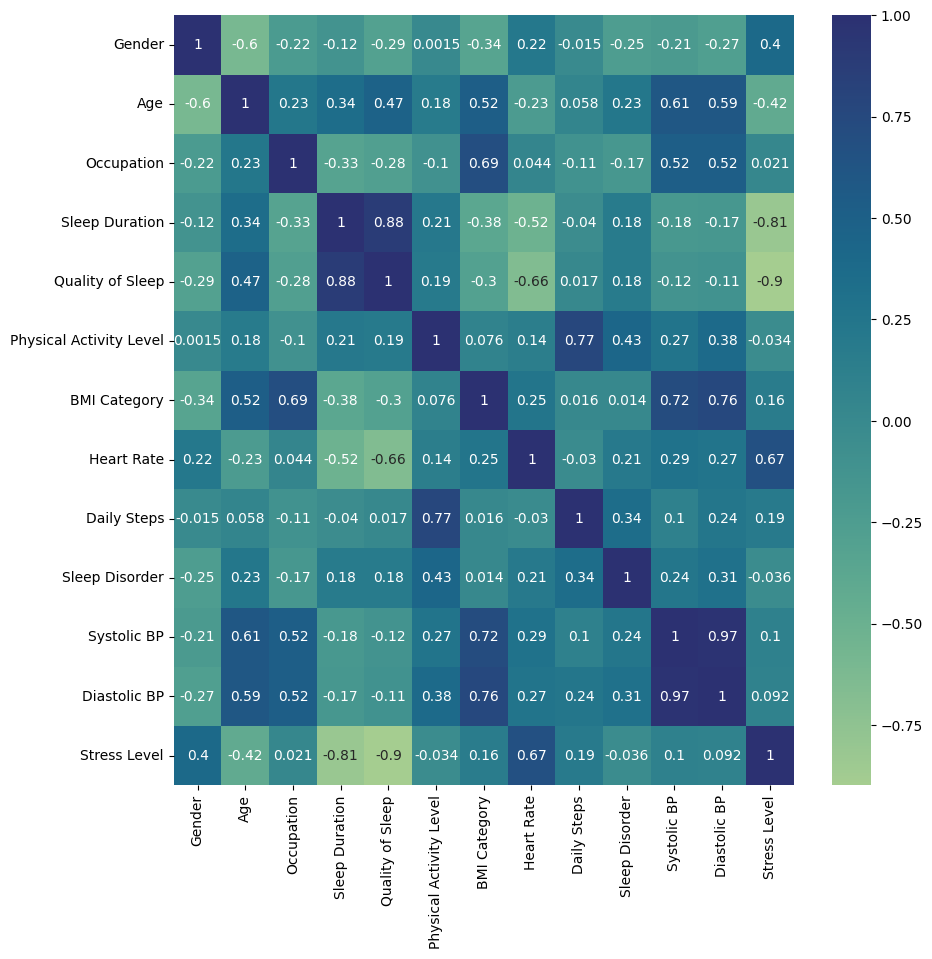

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(stress.corr(), cmap = 'crest', annot = True)
plt.show

**Positively Correlated columns:**
* "Quality of Sleep" and "Sleep Duration"
* "Occupation" and "BMI Category"
* "Systolic BP" and "BMI Category"
* "Diastolic BP" and "BMI Category"

**Negatively Correlated columns:**
* "Heart Rate" and "Quality of Sleep"
* "Heart Rate" and "Sleep Duration"

**No correlation with Target column: Stress level:**
* "Sleep Disorder"
* "Physical Activity Level".

Hence we drop, Sleep Disorder, Physical Activity Level, Diastolic BP and Quality of Sleep columns.

<function matplotlib.pyplot.show(close=None, block=None)>

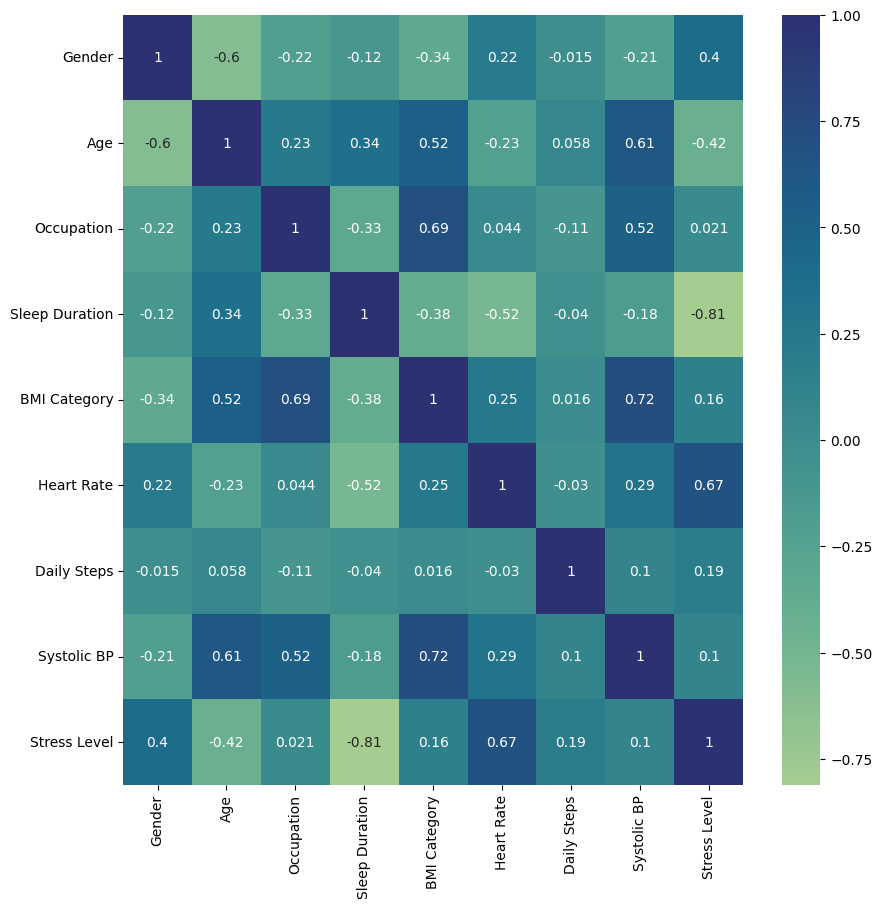

In [ ]:
stress.drop('Sleep Disorder', axis=1, inplace=True)
stress.drop('Physical Activity Level', axis=1, inplace=True)
stress.drop('Diastolic BP', axis=1, inplace=True)
stress.drop('Quality of Sleep', axis=1, inplace=True)

#Plot the heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(stress.corr(), cmap = 'crest', annot = True)
plt.show

In [ ]:
stress.head(1)


,Gender,Age,Occupation,Sleep Duration,BMI Category,Heart Rate,Daily Steps,Systolic BP,Stress Level
0,1,27,9,6.1,2,77,4200,126,6


In [ ]:
categorical_cols = ['Occupation', 'Gender', 'BMI Category']

# One-hot encode categorical columns
stress_encoded = pd.get_dummies(stress, columns=categorical_cols, drop_first=True)


# 6. Importing Modules & Packages

In [ ]:
from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix            # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report       # Import the classification_report function for detailed classification metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# 7. Data Preparation

In [ ]:
# Split the data into features (X) and the target variable (y)
X = stress_encoded.drop(['Stress Level'], axis=1)
y = stress_encoded['Stress Level']

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (299, 18)
y_train shape: (299,)
X_test shape: (75, 18)
y_test shape: (75,)


In [ ]:
X_train

,Age,Sleep Duration,Heart Rate,Daily Steps,Systolic BP,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Gender_1,BMI Category_1,BMI Category_2
192,43,6.5,72,6000,130,False,False,False,False,False,False,True,False,False,False,True,False,True
75,33,6.0,72,5000,125,True,False,False,False,False,False,False,False,False,False,True,False,False
84,35,7.5,70,8000,120,False,False,False,False,False,False,False,False,True,False,True,False,False
362,59,8.2,68,7000,140,False,False,False,False,True,False,False,False,False,False,False,False,True
16,29,6.5,80,4000,132,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,33,6.1,72,5000,125,True,False,False,False,False,False,False,False,False,False,True,False,False
106,37,6.1,77,4200,126,False,False,False,False,True,False,False,False,False,False,False,False,True
270,49,6.1,75,10000,140,False,False,False,False,True,False,False,False,False,False,False,False,True
348,57,8.2,68,7000,140,False,False,False,False,True,False,False,False,False,False,False,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Sleep Duration', 'Heart Rate', 'Daily Steps', 'Systolic_BP']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# A. Naive Bayes

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [ ]:
naive_bayes.score(X_test,y_test)

0.9333333333333333

In [ ]:
y_predict = naive_bayes.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  1 13  0  0  0]
 [ 0  1  1  8  0  0]
 [ 0  0  0  0 11  1]
 [ 0  0  1  0  0 16]]


In [ ]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.83      1.00      0.91        10
           5       0.87      0.93      0.90        14
           6       1.00      0.80      0.89        10
           7       1.00      0.92      0.96        12
           8       0.94      0.94      0.94        17

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



Naive Bayes Model gives an accuracy of 93%.

# B. Support Vector Mechanism

In [ ]:
svm_classifier = svm.SVC(kernel='linear')

In [ ]:
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.92


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 11  1  2  0]
 [ 0  1  0  8  0  1]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  1 16]]
Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.91      1.00      0.95        10
           5       1.00      0.79      0.88        14
           6       0.89      0.80      0.84        10
           7       0.80      1.00      0.89        12
           8       0.94      0.94      0.94        17

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.93      0.92      0.92        75



The accuracy of SVM is 92%.

# C. KNN Classifier


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,y_test)


0.9333333333333333

In [ ]:
y_predict = knn.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 13  1  0  0]
 [ 0  1  0  8  1  0]
 [ 0  0  0  0 12  0]
 [ 0  0  2  0  0 15]]


In [ ]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.91      1.00      0.95        10
           5       0.87      0.93      0.90        14
           6       0.89      0.80      0.84        10
           7       0.92      1.00      0.96        12
           8       1.00      0.88      0.94        17

    accuracy                           0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75




KNN Classifier model demostrates an accuracy of approx 93%.

# D. Random Forest Classifier


In [ ]:
random_forest = RandomForestClassifier(n_estimators=13)
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13)

In [ ]:
random_forest.score(X_test,y_test)

1.0

In [ ]:
y_predict = random_forest.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 17]]


In [ ]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        17

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



The Random Forest model demonstrates high precision, recall, and F1-score for most stress levels, indicating robust performance with 96% accuracy.


# E. Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
decision_tree.score(X_test,y_test)

0.9733333333333334

In [ ]:
y_predict = decision_tree.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 12  2  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 17]]


In [ ]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      0.86      0.92        14
           6       0.83      1.00      0.91        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        17

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75



The Decision Tree model has an accuracy of 97%.
 Overall, the model demonstrates high accuracy and balanced performance across different stress levels.

In [ ]:
model_names = ['Naive Bayes',  'SVM', 'KNN', 'Random Forest', 'Decision Tree',]
accuracy_scores = [92.33, 92, 92.33, 96, 97.33]
,
data = {'Model': model_names, 'Accuracy Score': accuracy_scores}

df = pd.DataFrame(data)

colors = px.colors.qualitative.Pastel

fig = px.bar(df, x='Model', y='Accuracy Score', text='Accuracy Score',
             title='Comparison of Model Accuracy', color='Model',
             color_discrete_map={model: color for model, color in zip(model_names, colors)})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(width=700, height=600)

fig.show()

# 8.  Conclusion

The Random Forest Classifier and Decision Tree models emerged as the top performers, achieving good accuracy scores of 96% and 97%, respectively.

Furthermore, it's important to acknowledge the impact of data size on model performance. With a relatively small dataset, the ability of models to generalize might be compromised, leading to variations in performance.

 Additionally, fine-tuning model parameters and exploring ensemble methods could further improve predictive accuracy. Overall, this project contributes to our understanding of stress level detection and highlights avenues for future exploration in the field of mental health prediction.

# 9. Stress Level Detection


Here, I have used Random Forest model for the detection.

Once we input the values of the columns, we get the Stress Level as output.


In [ ]:
X = stress.drop(['Stress Level'], axis=1)
y = stress['Stress Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
decision_tree.score(X_test,y_test)

0.9733333333333334

In [ ]:
y_predict = decision_tree.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 12  2  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 17]]


In [ ]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      0.86      0.92        14
           6       0.83      1.00      0.91        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        17

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75



In [ ]:
def get_user_input():
    gender = int(input("Gender (Male: 1, Female: 0): "))
    age = int(input("Age: "))
    print( "['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']")
    occupation = int(input("Occupation (encoded): "))
    sleep_duration = float(input("Sleep Duration (hours): "))
    bmi_category = int(input("BMI Category (Underweight: 1, Normal: 2, Overweight: 3): "))
    heart_rate = int(input("Heart Rate (bpm): "))
    daily_steps = int(input("Daily Steps: "))
    systolic_bp = int(input("Systolic Blood Pressure: "))

    # Create a dictionary with the user input
    user_data = {
        'Gender': gender,
        'Age': age,
        'Occupation': occupation,
        'Sleep Duration': sleep_duration,
        'BMI Category': bmi_category,
        'Heart Rate': heart_rate,
        'Daily Steps': daily_steps,
        'Systolic BP': systolic_bp # Use 'Systolic BP' as per X_train
    }
    # Convert the dictionary to a DataFrame with a single row
    user_input_df = pd.DataFrame([user_data])

    return user_input_df


user_input = get_user_input()

predicted_stress_level = decision_tree.predict(user_input)

print("Predicted Stress Level:", f"{predicted_stress_level[0]}/10")

Gender (Male: 1, Female: 0): 1
Age: 21
['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']
Occupation (encoded): 9
Sleep Duration (hours): 5
BMI Category (Underweight: 1, Normal: 2, Overweight: 3): 1
Heart Rate (bpm): 71
Daily Steps: 4200
Systolic Blood Pressure: 120
Predicted Stress Level: 8/10
